<a href="https://colab.research.google.com/github/CarolinaOutoffice/challenge1_analisis_datos/blob/main/challenge1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#tienda.head()

#Identificador de tienda
tienda['origen']='Tienda'
tienda2['origen']='Tienda2'
tienda3['origen']='Tienda3'
tienda4['origen']='Tienda4'

#contatenar datasets
tienda_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


#1. Análisis de facturación



In [2]:
# Revisar registros con precio nulo o no numericos
atipicos = tienda_total[
    (tienda_total['Precio'].isnull()) |           # Nulos
    (~tienda_total['Precio'].apply(lambda x: isinstance(x, (int, float))))  # No numérico
]

if  len(atipicos) == 0:
    print("No existen valores atipicos en el precio")
else:
    print(atipicos)

total_facturacion=tienda_total['Precio'].sum()
print(f"Total facturación: ${total_facturacion:,.2f}")


No existen valores atipicos en el precio
Total facturación: $4,403,619,200.00


In [3]:
# Agrupar por tienda y sumar precio
suma_por_tienda = tienda_total.groupby('origen')['Precio'].sum()

# Formatear el resultado con separador de miles
suma_por_tienda_formateado = suma_por_tienda.apply(lambda x: f"${x:,.2f}")

# Mostrar el resultado
print(suma_por_tienda_formateado)


origen
Tienda     $1,150,880,400.00
Tienda2    $1,116,343,500.00
Tienda3    $1,098,019,600.00
Tienda4    $1,038,375,700.00
Name: Precio, dtype: object


#####   1.1 Grafico analisis de facturacion: 🍰

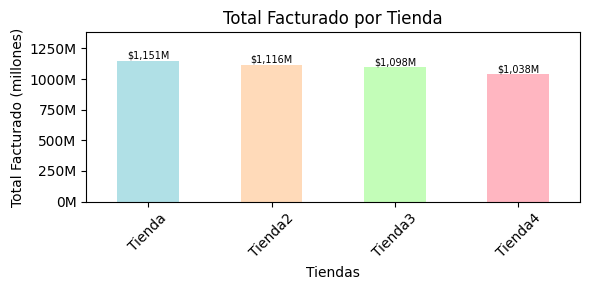

In [4]:
# Grafica de los resultados
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Función para formatear en millones
def millones(x, pos):
    return f'{x/1_000_000:.0f}M'

formatter = FuncFormatter(millones)

# Lista de colores para cada barra
colores = ['#B0E0E6', '#FFDAB9', '#C3FDB8', '#FFB6C1']

# Crear un gráfico de barras
plt.figure(figsize=(6, 3))
suma_por_tienda.plot(kind='bar', color=colores)

#Formato de eje en millones
plt.gca().yaxis.set_major_formatter(formatter)

# Configurar etiquetas y título
plt.title('Total Facturado por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Total Facturado (millones)')
plt.xticks(rotation=45)
plt.tight_layout()

#Obtener el valor maximo y aumentar el limite del eje
max_value = suma_por_tienda.max()
plt.ylim(0, max_value * 1.2)

#Mostrar etiquetas
for i, v in enumerate(suma_por_tienda):
    plt.text(i, v, f"${v/1_000_000:,.0f}M", ha='center', va='bottom', fontsize=7)

plt.show()



# 2. Ventas por categoría

In [5]:
# Filtrar registros categorias nulas o inconsistentes
atipicos = tienda_total[
    (tienda_total['Categoría del Producto'].isnull()) |           # Nulos
    (tienda_total['Categoría del Producto']=="")  # Vacios
]

if  len(atipicos) == 0:
    print("No existen valores atipicos en el precio")
else:
    print(atipicos)


No existen valores atipicos en el precio


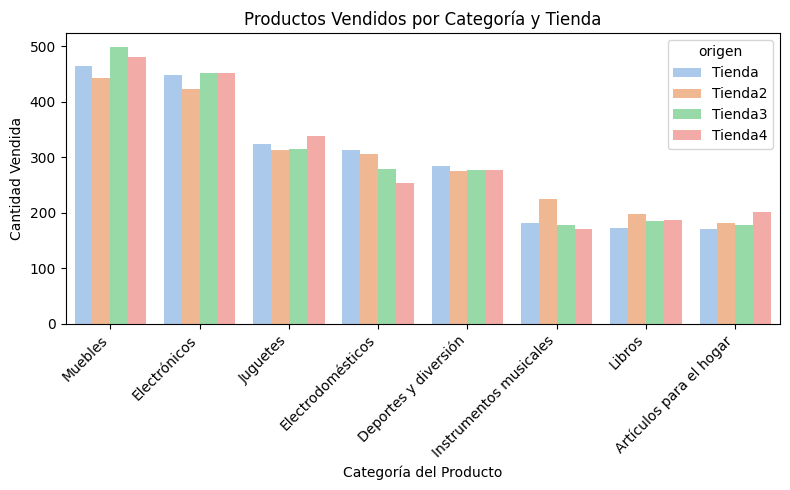

In [6]:
#Suma Precio por Categoria
cta_por_categoria= tienda_total.groupby(['origen', 'Categoría del Producto'])['Precio'].count()

cta_df = cta_por_categoria.reset_index(name='Conteo')
cta_categorias_ordenado = cta_df.sort_values(by=['origen', 'Conteo'], ascending=[True, False])


#Mostrar resultados
#print(cta_categorias_ordenado)


#GRAFICO
import seaborn as sns
#import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Gráfico de barras agrupadas
sns.barplot(
    data=cta_categorias_ordenado,
    x='Categoría del Producto',
    y='Conteo',
    hue='origen',
    palette='pastel'
)

plt.title('Productos Vendidos por Categoría y Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


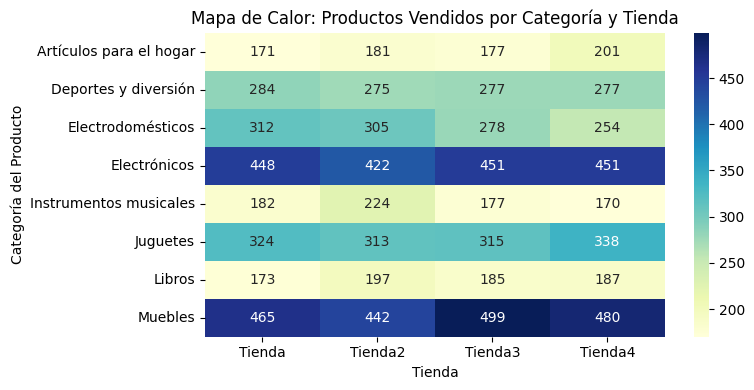

In [ ]:
# Mapa de calor para venta de productos por tienda
pivot = cta_df.pivot(index='Categoría del Producto', columns='origen', values='Conteo').fillna(0)
plt.figure(figsize=(8, 4))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')

plt.title('Mapa de Calor: Productos Vendidos por Categoría y Tienda')
plt.xlabel('Tienda')
plt.ylabel('Categoría del Producto')
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [7]:
# Promedio calificacion por tienda
promedio_calificacion_tienda= tienda_total.groupby(['origen'])['Calificación'].mean()
print(promedio_calificacion_tienda)

origen
Tienda     3.976685
Tienda2    4.037304
Tienda3    4.048326
Tienda4    3.995759
Name: Calificación, dtype: float64


# 4. Productos más y menos vendidos

In [4]:
productos_por_tienda = tienda_total.groupby(['origen', 'Producto'])['Precio'].count()

mas_vendido = productos_por_tienda.groupby('origen').idxmax()
print("Más vendido por tienda:")
#print(mas_vendido)


menos_vendido = productos_por_tienda.groupby('origen').idxmin()
print("Menos vendido por tienda:")
#print(menos_vendido)


# Extraer registros completos
mas_vendidos_info = productos_por_tienda.loc[mas_vendido]
menos_vendidos_info = productos_por_tienda.loc[menos_vendido]

print("Top productos por tienda:")
print(mas_vendidos_info)

print("\nProductos menos vendidos por tienda:")
print(menos_vendidos_info)


Más vendido por tienda:
Menos vendido por tienda:
Top productos por tienda:
origen   Producto                 
Tienda   Armario                      60
Tienda2  Iniciando en programación    65
Tienda3  Kit de bancas                57
Tienda4  Cama box                     62
Name: Precio, dtype: int64

Productos menos vendidos por tienda:
origen   Producto                 
Tienda   Auriculares con micrófono    33
Tienda2  Juego de mesa                32
Tienda3  Bloques de construcción      35
Tienda4  Guitarra eléctrica           33
Name: Precio, dtype: int64


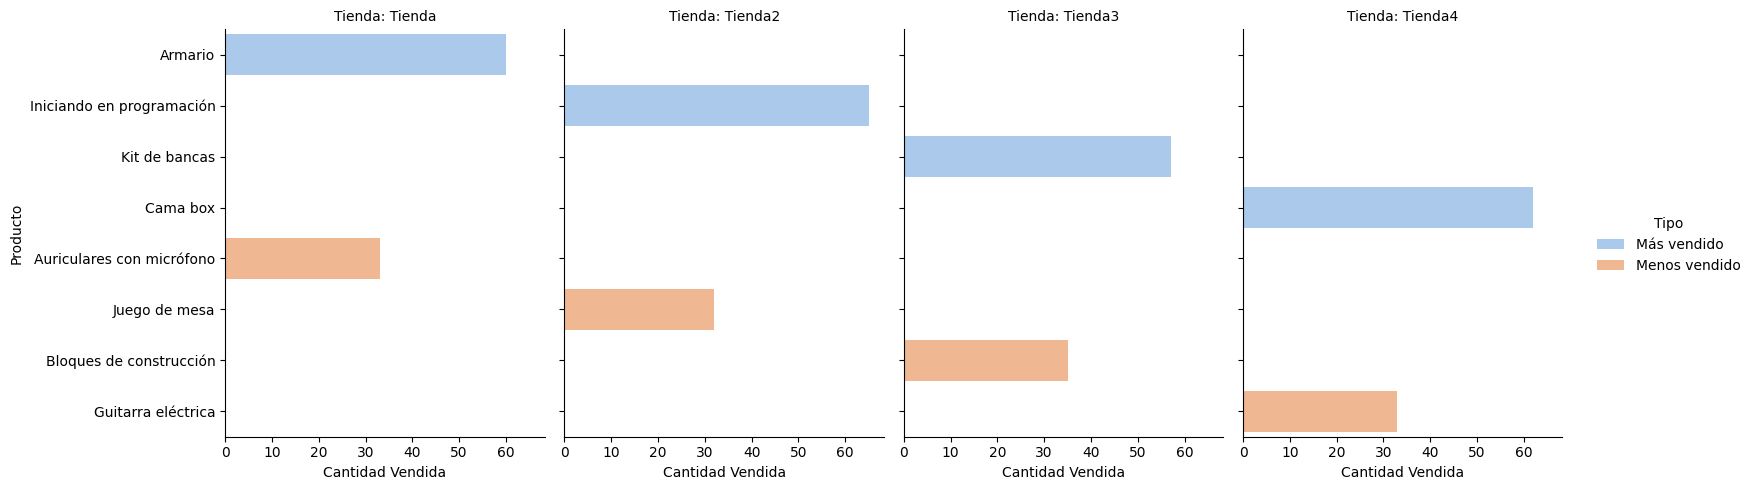

In [ ]:
#GRAFICO
g = sns.catplot(
    data=comparativo_df,
    kind='bar',
    x='Precio',
    y='Producto',
    hue='Tipo',
    col='origen',     # subgráfico por tienda
    palette='pastel',
    height=5,
    aspect=0.8
)

g.set_titles("Tienda: {col_name}")
g.set_axis_labels("Cantidad Vendida", "Producto")
g.tight_layout()


# 5. Envío promedio por tienda

In [ ]:
promedio_envio= tienda_total.groupby(['origen'])['Costo de envío'].mean()

promedio_envio_formateado = promedio_envio.apply(lambda x: f"${x:,.2f}")
print(promedio_envio_formateado)

origen
Tienda     $26,018.61
Tienda2    $25,216.24
Tienda3    $24,805.68
Tienda4    $23,459.46
Name: Costo de envío, dtype: object


# 6. Evaluacion facturacion menos costos de envio

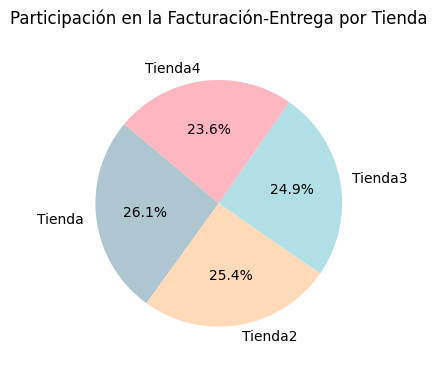

origen
Tienda     $1,089,502,500.00
Tienda2    $1,056,858,400.00
Tienda3    $1,039,503,000.00
Tienda4      $983,058,300.00
dtype: object


In [5]:
sum_facturacion_menos_costo_envio=tienda_total.groupby(['origen'])['Precio'].sum() - tienda_total.groupby(['origen'])['Costo de envío'].sum()
sum_facturacion_menos_costo_envio_formateado = sum_facturacion_menos_costo_envio.apply(lambda x: f"${x:,.2f}")
#print(sum_facturacion_menos_costo_envio_formateado)

import matplotlib.pyplot as plt

# Usamos la serie sin formatear (números reales)
labels = sum_facturacion_menos_costo_envio.index
sizes = sum_facturacion_menos_costo_envio.values

plt.figure(figsize=(4, 4))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#AEC6CF', '#FFDAB9', '#B0E0E6', '#FFB6C1']  # colores pastel opcionales
)

plt.title('Participación en la Facturación-Entrega por Tienda')
plt.axis('equal')
plt.tight_layout()
plt.show()

print(sum_facturacion_menos_costo_envio_formateado);

# 7 📝 Informe Final:
# Análisis Comparativo de tiendas para decisión comercial del Sr. Juan

## 🧭 Introducción

El propósito de este informe es identificar la tienda que el Sr. Juan debe cerrar, con base en un análisis exploratorio de datos realizado sobre cuatro tiendas distintas. Para ello, se evaluaron diversas métricas:

  1. Los ingresos totales de las tiendas.
  2. Las categorías de productos más y menos vendidos.
  3. Las calificaciones promedio de los clientes por tienda.
  4. Los productos más y menos vendidos.
  5. El coste de envío promedio para cada tienda.

---

## 📈 Desarrollo del Análisis

### 🪙 1. Los ingresos totales de las tiendas

Se calculó la facturación total vendida en cada tienda. Los resultados se visualizaron en un gráfico de columnas que muestra el total de ingresos por tienda (1.1). A continuación lista de tiendas ordenadas desde mayor a menor ingreso

- **Tienda1** con $1.150MM se encuentra en 1.º lugar  

- **Tienda2** con $1.116MM se encuentra en 2.º lugar

- **Tienda3** con $1.098MM se encuentra en 3.º lugar  

- **Tienda4** con $1.038MM se encuentra en 4.º lugar  


> **Interpretación**: Desde el punto de vista de ingresos, **Tienda4** representa la menor oportunidad comercial.

---

### 📦 2. Las categorías de productos más y menos vendidos

El análisis del volumen de ventas por categoría reveló:


Según lo observado en la grafica:

*   En general la categoria de producto más vendida son los muebles.
*   La segunda categoria de producto más vendido son los electrónicos.
*   Luego lo siguen los juguetes y electrodomésticos

***Interpretación**:  Las categorias mas vendidas son muebles y electrónicos.
---

### ⭐ 3. Las calificaciones promedio de los clientes por tienda

Las calificaciones promedio de los clientes muestran lo siguiente:

- **Tienda1** 3.97 promedio evaluación cliente.

- **Tienda2** 4.03 promedio evaluación cliente.

- **Tienda3** 4.04 promedio evaluación cliente.

- **Tienda4** 3,99 promedio evaluación cliente.

> **Interpretación**: Una mejor reputación genera confianza, por lo tanto **Tienda1** es la mas baja.


### 📈 4. Productos Más y Menos Vendidos

Se identificaron los productos más vendidos por tienda:

| Tienda |        Más vendido        |       Menos vendido       |
|--------|---------------------------|---------------------------|
|Tienda 1| Armario                   | Auriculares con microfonos|
|Tienda 2| Iniciando en programacion | Juego de mesa             |
|Tienda 3| Kit de bancas             | Bloques de construcción   |
|Tienda 4| Cama box                  | Guitarra electrica        |

---

### 🚚 5. Costo de Envío Promedio

Los costos promedios de envío  por tienda y ventas-costos de envío:



| Tienda   | Costo Promedio de Envío  |     Facturación Neta     |
|----------|--------------------------|--------------------------|
| Tienda   |                $26,018.61|      $1,089,502,500      |
| Tienda2  |                $25,216.24|      $1,056,858,400      |
| Tienda3  |                $24,805.68|      $1,039,503,000      |
| Tienda4  |                $23,459.46|        $983,058,300      |

---

## ✅ Conclusión y Recomendación

Después del análisis de los factores clave, se recomienda que:

> 💡 **El Sr. Juan cierre la tienda numero 4**

**Justificación:**

- Si bien tiene los costos de envío más bajos, no logra equilibrar el nivel más bajo de ventas, quedando $106.444.200 mas bajo que el promedio.

- Se recomienda analizar el margen o utilidad que deja cada tienda antes de generar cualquier acción, ya que el analisis esta basado en los datos proporcionados que no alcanzan a visualizar cual es la tienda que deja mayor nivel de utilidades.  Aunque es muy posible que se repita la sugerencia de cerrar la tienda 4.
---

_Informe basado en análisis de datos, visualizaciones y evaluación comparativa entre tiendas._
